In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sentiment_analysis import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoinecrettenand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoinecrettenand/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load data
df_trump_2016 = pd.read_csv("Data/2016/trump_2016.zip", compression="zip")
df_trump_2020 = pd.read_csv("Data/2020/trump_2020.zip", compression="zip")
df_clinton_2016 = pd.read_csv("Data/2016/clinton_2016.zip", compression="zip")
df_biden_2020 = pd.read_csv("Data/2020/biden_2020.zip", compression="zip")

In [3]:
# preprocess data for sentiment analysis
tags = ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
df_trump_2016 = preprocess_data_for_sentiment_analysis(df_trump_2016, tags=tags)
df_trump_2020 = preprocess_data_for_sentiment_analysis(df_trump_2020, tags=tags)
df_clinton_2016 = preprocess_data_for_sentiment_analysis(df_clinton_2016, tags=tags)
df_biden_2020 = preprocess_data_for_sentiment_analysis(df_biden_2020, tags=tags)

df_trump_2016.head()

[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']
[process_sa] Prepared for sentiment analysis with tags: ['quotation_lemmatized', 'quotation_stemmed', 'quotation_tokenized', 'quotation_conc_lemmatized']


,Unnamed: 0,Unnamed: 0.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized
0,3,1709,2016-07-07-033290,I didn't want to delete it -- I would have nev...,Donald J. Trump,['Q22686'],2016-07-07 01:49:02,4,"[['Donald J. Trump', '0.7791'], ['None', '0.21...",['http://mobile.nytimes.com/2016/07/07/us/poli...,E,Jul,NY Times,Donald Trump,"[i, did not, want, to, delete, it, i, would, h...","[did not, want, delet, would, never, delet, pe...","[did not, want, delete, would, never, deleted,...",did not want delete would never deleted people...
1,9,6715,2016-07-25-126140,"Wow, the Republican Convention went so smoothl...",Donald Trump,"['Q22686', 'Q27947481']",2016-07-25 00:00:00,171,"[['Donald Trump', '0.8662'], ['None', '0.1103'...",['http://dailyherald.com/article/20160725/news...,E,Jul,NY Times,Donald Trump,"[wow, the, , convention, went, so, smoothly, c...","[wow, , convent, went, smoothli, compar, dem, ...","[wow, , convention, went, smoothly, compared, ...",wow convention went smoothly compared dems to...
2,11,7112,2016-08-09-004561,"Although, the Second Amendment people -- maybe...",Donald Trump,"['Q22686', 'Q27947481']",2016-08-09 00:00:00,1183,"[['Donald Trump', '0.6569'], ['None', '0.2428'...",['http://onenewspage.com/video/20160809/525505...,E,Aug,NY Times,Donald Trump,"[although, the, second, amendment, people, , t...","[although, second, amend, peopl, , , do not, k...","[although, second, amendment, people, , , do n...",although second amendment people do not know
3,15,11168,2016-09-07-092168,She's totally unfit to be our commander in chief.,Donald J. Trump,['Q22686'],2016-09-07 16:38:49,2,"[['Donald J. Trump', '0.4223'], ['Donald Trump...",['http://www.nytimes.com/2016/09/08/us/politic...,E,Sep,NY Times,Donald Trump,"[she is, totally, unfit, to, , our, commander,...","[she i, total, unfit, , command, chief]","[she is, totally, unfit, , commander, chief]",she is totally unfit commander chief
4,16,13945,2016-09-07-003185,A Trump supporter is fighting against just abo...,Brad Pitt,"['Q35332', 'Q373912']",2016-09-07 10:34:00,16,"[['Brad Pitt', '0.3934'], ['None', '0.349'], [...",['http://eonline.com/news/792842/brad-pitt-wei...,E,Sep,NY Times,Donald Trump,"[a, trump, supporter, , fighting, against, jus...","[trump, support, , fight, , everyth]","[trump, supporter, , fighting, , everything]",trump supporter fighting everything


In [4]:
df_trump_2016_sa = expand_quotations_with_polarity_subjectivity(df_trump_2016, column='quotation_conc_lemmatized')
df_trump_2020_sa = expand_quotations_with_polarity_subjectivity(df_trump_2020, column='quotation_conc_lemmatized')
df_clinton_2016_sa = expand_quotations_with_polarity_subjectivity(df_clinton_2016, column='quotation_conc_lemmatized')
df_biden_2020_sa = expand_quotations_with_polarity_subjectivity(df_biden_2020, column='quotation_conc_lemmatized')

df_trump_2016_sa.head()

,Unnamed: 0,Unnamed: 0.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,month,type,candidate,quotation_tokenized,quotation_stemmed,quotation_lemmatized,quotation_conc_lemmatized,quotation_polarity,quotation_subjectivity
0,3,1709,2016-07-07-033290,I didn't want to delete it -- I would have nev...,Donald J. Trump,['Q22686'],2016-07-07 01:49:02,4,"[['Donald J. Trump', '0.7791'], ['None', '0.21...",['http://mobile.nytimes.com/2016/07/07/us/poli...,E,Jul,NY Times,Donald Trump,"[i, did not, want, to, delete, it, i, would, h...","[did not, want, delet, would, never, delet, pe...","[did not, want, delete, would, never, deleted,...",did not want delete would never deleted people...,0.000000,0.0000
1,9,6715,2016-07-25-126140,"Wow, the Republican Convention went so smoothl...",Donald Trump,"['Q22686', 'Q27947481']",2016-07-25 00:00:00,171,"[['Donald Trump', '0.8662'], ['None', '0.1103'...",['http://dailyherald.com/article/20160725/news...,E,Jul,NY Times,Donald Trump,"[wow, the, , convention, went, so, smoothly, c...","[wow, , convent, went, smoothli, compar, dem, ...","[wow, , convention, went, smoothly, compared, ...",wow convention went smoothly compared dems to...,0.120833,0.5875
2,11,7112,2016-08-09-004561,"Although, the Second Amendment people -- maybe...",Donald Trump,"['Q22686', 'Q27947481']",2016-08-09 00:00:00,1183,"[['Donald Trump', '0.6569'], ['None', '0.2428'...",['http://onenewspage.com/video/20160809/525505...,E,Aug,NY Times,Donald Trump,"[although, the, second, amendment, people, , t...","[although, second, amend, peopl, , , do not, k...","[although, second, amendment, people, , , do n...",although second amendment people do not know,0.000000,0.0000
3,15,11168,2016-09-07-092168,She's totally unfit to be our commander in chief.,Donald J. Trump,['Q22686'],2016-09-07 16:38:49,2,"[['Donald J. Trump', '0.4223'], ['Donald Trump...",['http://www.nytimes.com/2016/09/08/us/politic...,E,Sep,NY Times,Donald Trump,"[she is, totally, unfit, to, , our, commander,...","[she i, total, unfit, , command, chief]","[she is, totally, unfit, , commander, chief]",she is totally unfit commander chief,0.000000,0.7500
4,16,13945,2016-09-07-003185,A Trump supporter is fighting against just abo...,Brad Pitt,"['Q35332', 'Q373912']",2016-09-07 10:34:00,16,"[['Brad Pitt', '0.3934'], ['None', '0.349'], [...",['http://eonline.com/news/792842/brad-pitt-wei...,E,Sep,NY Times,Donald Trump,"[a, trump, supporter, , fighting, against, jus...","[trump, support, , fight, , everyth]","[trump, supporter, , fighting, , everything]",trump supporter fighting everything,0.000000,0.0000


## Plot the frequency distributions of polarity and subjectivity

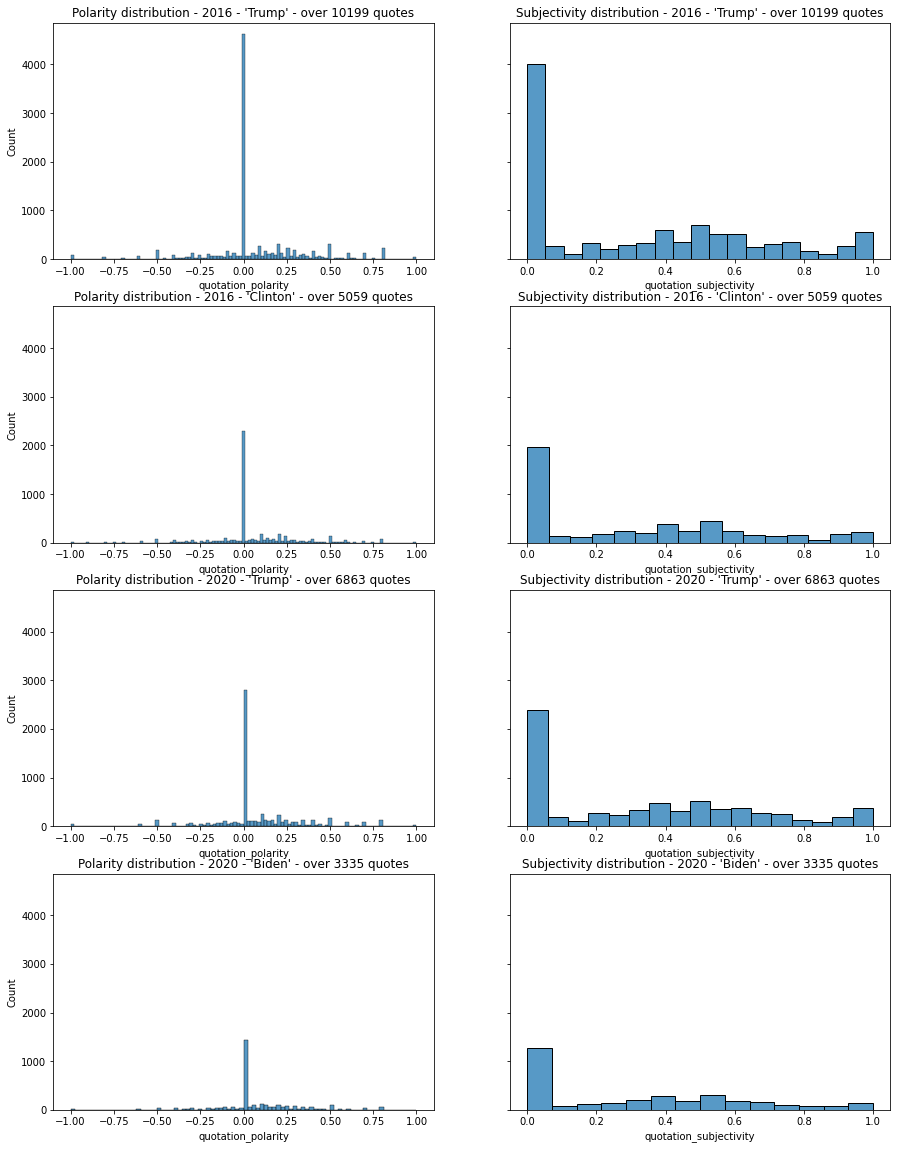

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)

sns.histplot(df_trump_2016_sa['quotation_polarity'], ax=axes[0][0])
axes[0][0].set_title(f'Polarity distribution - 2016 - \'Trump\' - over {len(df_trump_2016_sa)} quotes')
sns.histplot(df_trump_2016_sa['quotation_subjectivity'], ax=axes[0][1])
axes[0][1].set_title(f'Subjectivity distribution - 2016 - \'Trump\' - over {len(df_trump_2016_sa)} quotes')

sns.histplot(df_clinton_2016_sa['quotation_polarity'], ax=axes[1][0])
axes[1][0].set_title(f'Polarity distribution - 2016 - \'Clinton\' - over {len(df_clinton_2016_sa)} quotes')
sns.histplot(df_clinton_2016_sa['quotation_subjectivity'], ax=axes[1][1])
axes[1][1].set_title(f'Subjectivity distribution - 2016 - \'Clinton\' - over {len(df_clinton_2016_sa)} quotes')

sns.histplot(df_trump_2020_sa['quotation_polarity'], ax=axes[2][0])
axes[2][0].set_title(f'Polarity distribution - 2020 - \'Trump\' - over {len(df_trump_2020_sa)} quotes')
sns.histplot(df_trump_2020_sa['quotation_subjectivity'], ax=axes[2][1])
axes[2][1].set_title(f'Subjectivity distribution - 2020 - \'Trump\' - over {len(df_trump_2020_sa)} quotes')

sns.histplot(df_biden_2020_sa['quotation_polarity'], ax=axes[3][0])
axes[3][0].set_title(f'Polarity distribution - 2020 - \'Biden\' - over {len(df_biden_2020_sa)} quotes')
sns.histplot(df_biden_2020_sa['quotation_subjectivity'], ax=axes[3][1])
axes[3][1].set_title(f'Subjectivity distribution - 2020 - \'Biden\' - over {len(df_biden_2020_sa)} quotes')

fig.savefig('Data/Visualization/Frequency_Distribution_Of_Polarity_Subjectivity_Trump_Clinton_Biden_Quotes.png', transparent=True)

## Timeline of polarity and subjectivity distribution over 2016 and 2020 elections

In [6]:
def preprocess_data_for_visualisation(df_candidates, months, candidates, subjectivity=False):
    # TODO find a better way I guess ?

    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    # aggregate data over month and candidate
    tmp = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).mean()[f'quotation_{metric}']
    cross = []
    for candidate in candidates:
        for month in months:
            cross.append([candidate, month])

    # magic trick to convert to standard df
    tmp = pd.DataFrame([[month, tmp.at[month][candidate], candidate] for candidate, month in cross], columns=['month', f'quotation_{metric}', 'candidate'])
    return tmp

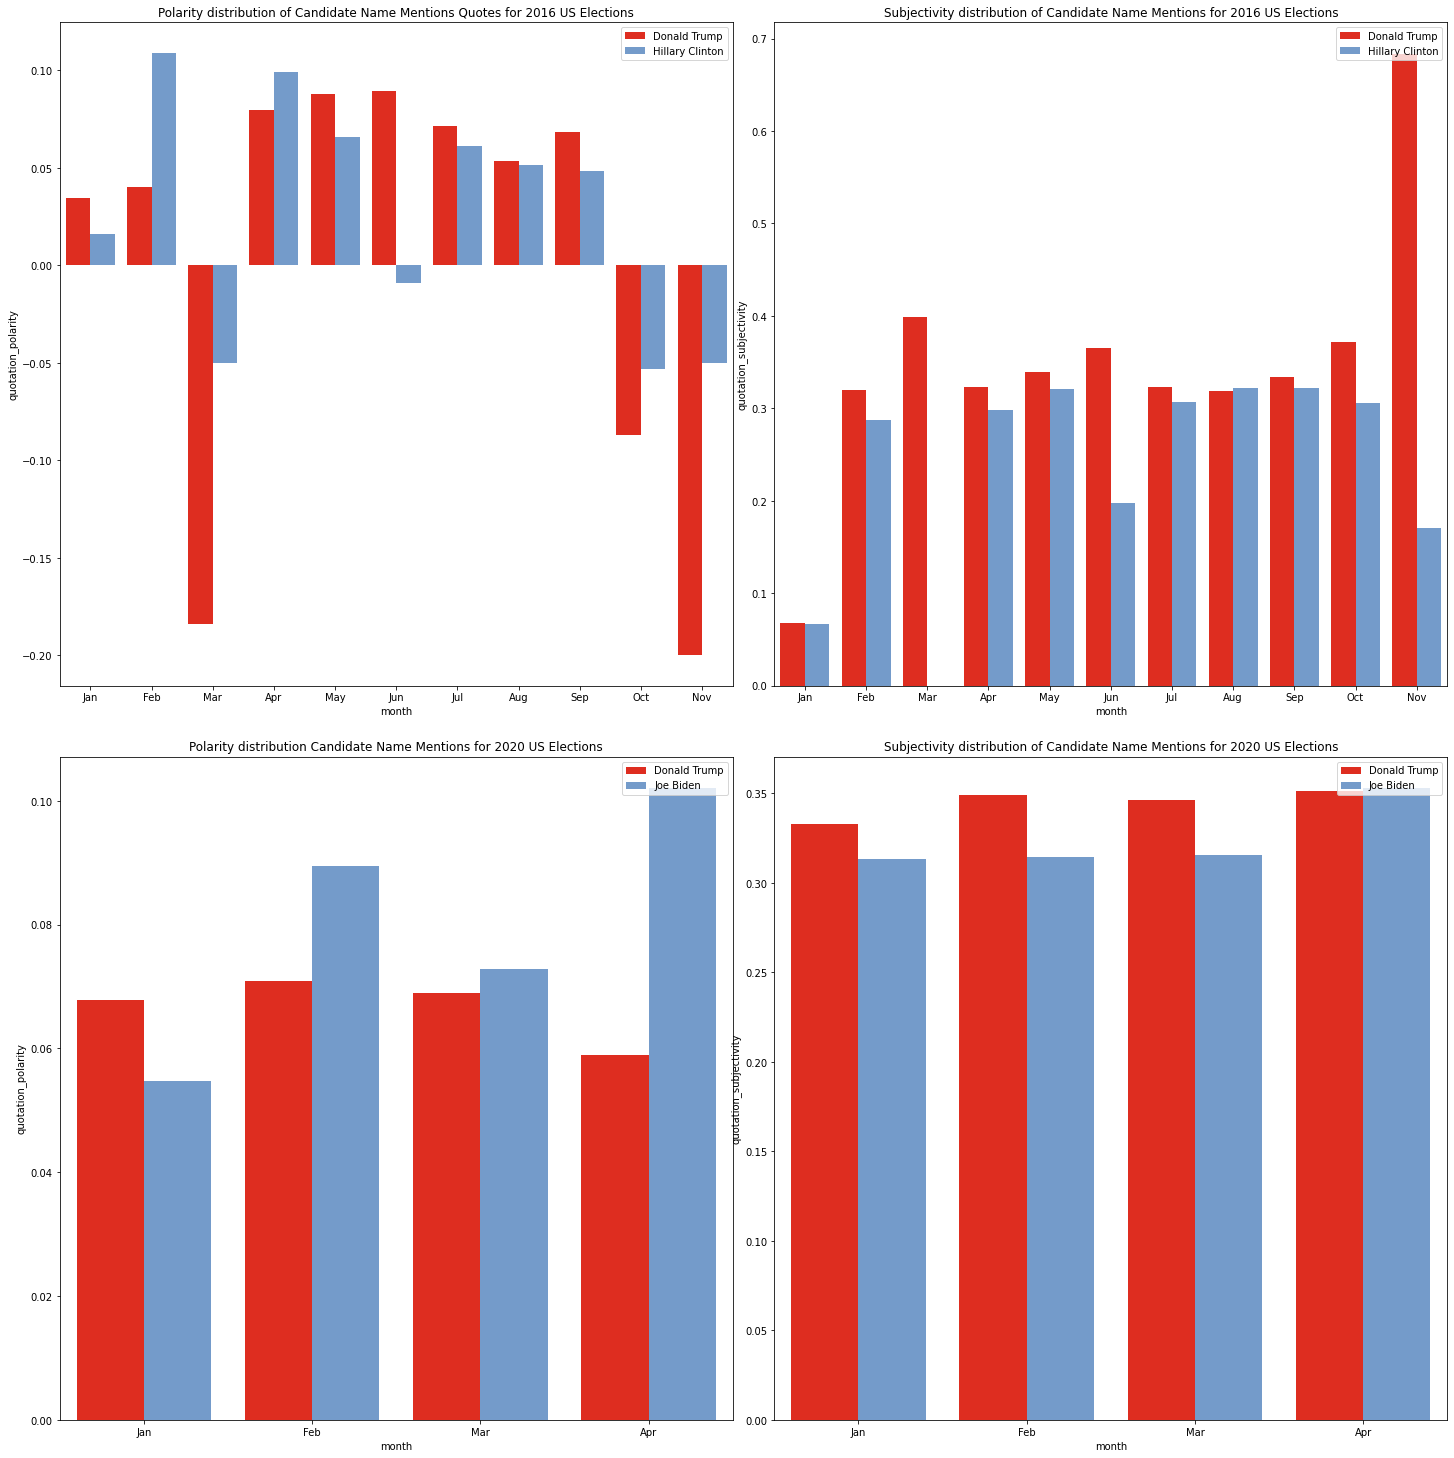

In [7]:
months_2016 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2020 = ['Jan', 'Feb', 'Mar', 'Apr']
candidates_2016 = ['Donald Trump', 'Hillary Clinton']
candidates_2020 = ['Donald Trump', 'Joe Biden']

df_candidates_2016 = pd.concat([df_trump_2016_sa, df_clinton_2016_sa], ignore_index=True)
df_candidates_2020 = pd.concat([df_trump_2020_sa, df_biden_2020_sa], ignore_index=True)

# The quotes are aggregated and averaged by month and by candidate
df_candidates_2016_polarity_processed = preprocess_data_for_visualisation(df_candidates_2016, months_2016, candidates_2016)
df_candidates_2020_polarity_processed = preprocess_data_for_visualisation(df_candidates_2020, months_2020, candidates_2020)
df_candidates_2016_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2016, months_2016, candidates_2016, subjectivity=True)
df_candidates_2020_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2020, months_2020, candidates_2020, subjectivity=True)

fig, axs = plt.subplots(2, 2, figsize=(20,20))
fig.tight_layout(h_pad=5)

axs[0][0].set_title("Polarity distribution of Candidate Name Mentions Quotes for 2016 US Elections")
sns.barplot(x='month', y='quotation_polarity', estimator=np.mean, ci="sd", capsize=2, data=df_candidates_2016_polarity_processed, hue="candidate", order=months_2016, ax=axs[0][0], palette=["#fe1100",'#6699d8'])
axs[0][0].legend(loc='upper right')
axs[1][0].set_title("Polarity distribution Candidate Name Mentions for 2020 US Elections")
sns.barplot(x='month', y='quotation_polarity', data=df_candidates_2020_polarity_processed, hue="candidate", order=months_2020, ax=axs[1][0], palette=["#fe1100",'#6699d8'])
axs[1][0].legend(loc='upper right')

axs[0][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2016 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', estimator=np.mean, ci="sd", capsize=.2, data=df_candidates_2016_subjectivity_processed, hue="candidate", order=months_2016, ax=axs[0][1], palette=["#fe1100",'#6699d8'])
axs[0][1].legend(loc='upper right')
axs[1][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2020 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', data=df_candidates_2020_subjectivity_processed, hue="candidate", order=months_2020, ax=axs[1][1], palette=["#fe1100",'#6699d8'])
axs[1][1].legend(loc='upper right')

## Wordcloud of positive and negative quotes (50% threshold)

In [8]:
from collections import Counter
from wordcloud import WordCloud          
import matplotlib.pyplot as plt   

def plot_word_cloud(string: str, filter_keywords=[]):
    for keyword in filter_keywords:
        string = string.replace(keyword, '')

    string_split = Counter(string.split(' '))
    counts = {k:v for k, v in string_split.most_common(200)}

    fig = plt.figure(figsize=(15,15))
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue').generate_from_frequencies(counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [9]:
def extract_positive_sentiment(df_quotes, threshold=0.5):
    #map [0, 1] to [-1, 1]
    polarity_thresh = threshold * 2 - 1
    polarity_quotes = df_quotes[df_quotes['quotation_polarity'] > polarity_thresh]
    subjective_quotes = df_quotes[df_quotes['quotation_subjectivity'] > threshold]
    return polarity_quotes, subjective_quotes

def extract_negative_sentiment(df_quotes, threshold=0.5):
    #map [0, 1] to [-1, 1]
    polarity_thresh = threshold * 2 - 1
    polarity_quotes = df_quotes[df_quotes['quotation_polarity'] < -polarity_thresh]
    subjective_quotes = df_quotes[df_quotes['quotation_subjectivity'] < threshold]
    return polarity_quotes, subjective_quotes    

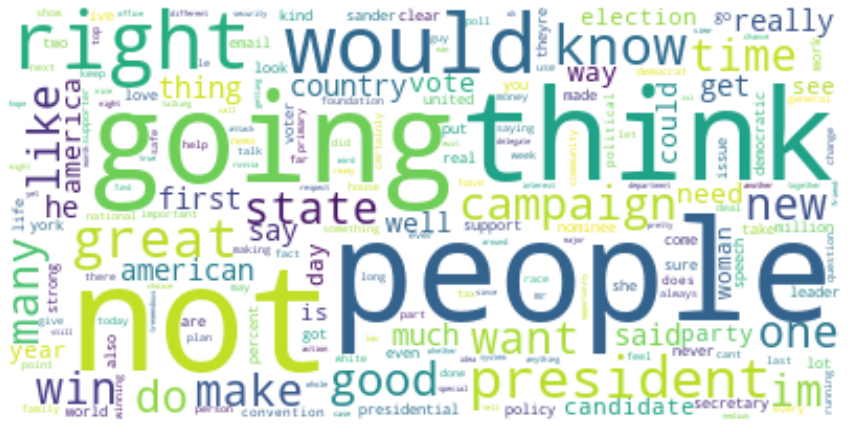

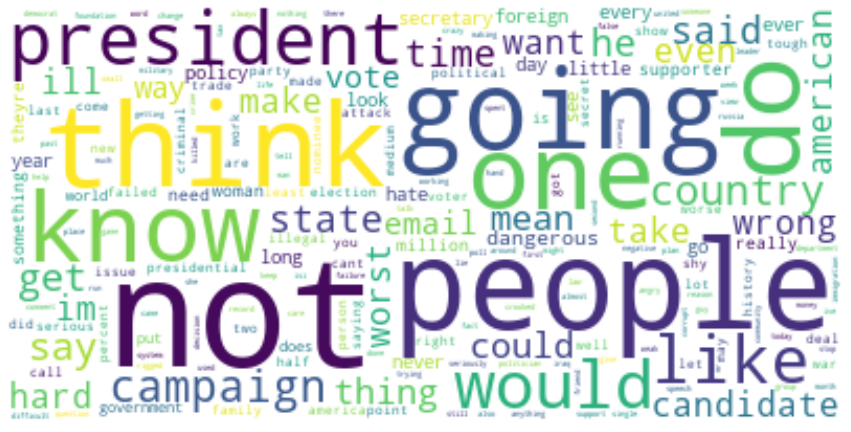

In [10]:
# filter quotes with only good sentiment
positive_pol_quotes, _ = extract_positive_sentiment(df_candidates_2016, threshold=0.5)
negative_pol_quotes, _ = extract_negative_sentiment(df_candidates_2016, threshold=0.5)

positive_long_string = ' '.join(list(' '.join(x) for x in positive_pol_quotes['quotation_lemmatized'].values))
negative_long_string = ' '.join(list(' '.join(x) for x in negative_pol_quotes['quotation_lemmatized'].values))

plot_word_cloud(positive_long_string, filter_keywords=['donald', 'trump', 'hillary', 'clinton'])
plot_word_cloud(negative_long_string, filter_keywords=['donald', 'trump', 'hillary', 'clinton'])